In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
import torch
import torch.nn as nn
import torch.optim as optim

In [3]:
from utils import load_mnist
from trainer import Trainer

In [4]:
def show_image(x):
    if x.dim() == 1:
        x = x.view(int(x.size(0) ** .5), -1).to("cpu")
    
    plt.imshow(x, cmap="gray")
    plt.show()

In [5]:
from argparse import Namespace

config = {
    "train_ratio": .8,
    "batch_size": 256,
    "n_epochs": 50,
    "verbose": 1,
    "btl_size": 2
}

config = Namespace(**config)

print(config)

Namespace(batch_size=256, btl_size=2, n_epochs=50, train_ratio=0.8, verbose=1)


In [6]:
train_x, train_y = load_mnist(flatten=True)
test_x, test_y = load_mnist(is_train=False, flatten=True)

train_x = train_x
train_cnt = int(train_x.size(0) * config.train_ratio)
valid_cnt = train_x.size(0) - train_cnt

# Shuffle dataset to split into train/valid set.
indices = torch.randperm(train_x.size(0))
train_x, valid_x = torch.index_select(
    train_x,
    dim=0,
    index=indices
).split([train_cnt, valid_cnt], dim=0)
train_y, valid_y = torch.index_select(
    train_y,
    dim=0,
    index=indices
).split([train_cnt, valid_cnt], dim=0)

print("Train:", train_x.shape, train_y.shape)
print("Valid:", valid_x.shape, valid_y.shape)
print("Test:", test_x.shape, test_y.shape)

Train: torch.Size([48000, 784]) torch.Size([48000])
Valid: torch.Size([12000, 784]) torch.Size([12000])
Test: torch.Size([10000, 784]) torch.Size([10000])


In [7]:
train_x = train_x.to("cuda")
valid_x = valid_x.to("cuda")
test_x = test_x.to("cuda")

In [8]:
from model import Autoencoder

In [9]:
model = Autoencoder(btl_size=config.btl_size).to("cuda")
optimizer = optim.Adam(model.parameters())
crit = nn.MSELoss()

trainer = Trainer(model, optimizer, crit)

In [10]:
trainer.train((train_x, train_x), (valid_x, valid_x), config)

Epoch(1/50): train_loss=5.8644e-02  valid_loss=4.6657e-02  lowest_loss=4.6657e-02
Epoch(2/50): train_loss=4.4889e-02  valid_loss=4.2553e-02  lowest_loss=4.2553e-02
Epoch(3/50): train_loss=4.2630e-02  valid_loss=4.1214e-02  lowest_loss=4.1214e-02
Epoch(4/50): train_loss=4.1554e-02  valid_loss=4.0224e-02  lowest_loss=4.0224e-02
Epoch(5/50): train_loss=4.0698e-02  valid_loss=3.9203e-02  lowest_loss=3.9203e-02
Epoch(6/50): train_loss=4.0287e-02  valid_loss=3.9833e-02  lowest_loss=3.9203e-02
Epoch(7/50): train_loss=4.0059e-02  valid_loss=3.8526e-02  lowest_loss=3.8526e-02
Epoch(8/50): train_loss=3.9408e-02  valid_loss=3.9110e-02  lowest_loss=3.8526e-02
Epoch(9/50): train_loss=3.9522e-02  valid_loss=3.8208e-02  lowest_loss=3.8208e-02
Epoch(10/50): train_loss=3.8817e-02  valid_loss=3.7826e-02  lowest_loss=3.7826e-02
Epoch(11/50): train_loss=3.9658e-02  valid_loss=3.8509e-02  lowest_loss=3.7826e-02
Epoch(12/50): train_loss=3.9387e-02  valid_loss=3.8505e-02  lowest_loss=3.7826e-02
Epoch(13/50):

## Mean value in each space

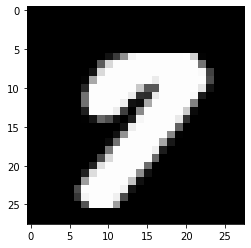

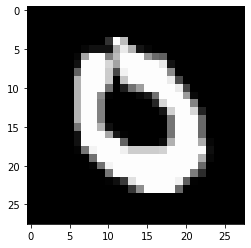

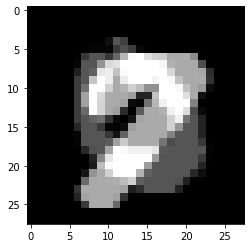

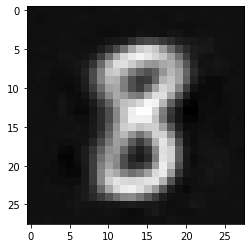

In [11]:
with torch.no_grad():
    import random
    
    index1 = int(random.random() * test_x.size(0))
    index2 = int(random.random() * test_x.size(0))
    
    z1 = model.encoder(test_x[index1].view(1, -1))
    z2 = model.encoder(test_x[index2].view(1, -1))
    
    recon = model.decoder((z1 + z2) / 2).squeeze()
    
    show_image(test_x[index1])
    show_image(test_x[index2])
    show_image((test_x[index1] + test_x[index2] / 2))
    show_image(recon)    